# Notebook 05: Time Use and Drug Choice Mini Projects

**Objective:** Work on two short case studies using Apollo datasets:

- **Time Use Data:** Explore how individuals allocate time across activities in a day, and perform a simple analysis or simulation related to time allocation (discrete-continuous choice context).

- **Drug Choice Data:** Analyze a stated preference survey on medication (drug) choices, perform an exploratory analysis of preferences (including attitudinal factors), and simulate a simple choice scenario or model outcome.

These projects reinforce data handling, analysis, and interpretation skills in new domains. They are less step-by-step tutorial and more open-ended, mirroring what a participant might do as an assignment. We will provide one EDA task and one modeling/simulation task for each dataset, complete with solutions.

## 05.1 Time Use Data Project

The Apollo time use dataset comes from a time diary survey. It contains 2,826 day-records from 447 individuals, with the amount of time (in minutes) spent on 12 different activity categories each day. Each record also includes personal attributes like gender, age, whether the person works full-time, and whether the day is a weekend.

Let's load the data:

In [2]:
import pandas as pd

df_time = pd.read_csv("../data/raw/apollo_timeUseData.csv")
print("Loaded time use data:", df_time.shape)
df_time.head(3)



Loaded time use data: (2826, 20)


,indivID,day,date,budget,t_a01,t_a02,t_a03,t_a04,t_a05,t_a06,t_a07,t_a08,t_a09,t_a10,t_a11,t_a12,female,age,occ_full_time,weekend
0,19209,2,20170124,1440,39,0,0,54,4,0,0,0,71,1189,83,0,1,34.5,0,0
1,19209,3,20170125,1440,23,0,0,0,0,0,0,0,75,1254,88,0,1,34.5,0,0
2,19209,7,20170129,1440,0,0,0,140,0,0,0,0,0,1278,22,0,1,34.5,0,1


In [3]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2826 entries, 0 to 2825
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   indivID        2826 non-null   int64  
 1   day            2826 non-null   int64  
 2   date           2826 non-null   int64  
 3   budget         2826 non-null   int64  
 4   t_a01          2826 non-null   int64  
 5   t_a02          2826 non-null   int64  
 6   t_a03          2826 non-null   int64  
 7   t_a04          2826 non-null   int64  
 8   t_a05          2826 non-null   int64  
 9   t_a06          2826 non-null   int64  
 10  t_a07          2826 non-null   int64  
 11  t_a08          2826 non-null   int64  
 12  t_a09          2826 non-null   int64  
 13  t_a10          2826 non-null   int64  
 14  t_a11          2826 non-null   int64  
 15  t_a12          2826 non-null   int64  
 16  female         2826 non-null   int64  
 17  age            2826 non-null   float64
 18  occ_full

In [4]:
print("Shape:", df_time.shape)
print("Columns:", df_time.columns.tolist())
df_time.describe()

Shape: (2826, 20)
Columns: ['indivID', 'day', 'date', 'budget', 't_a01', 't_a02', 't_a03', 't_a04', 't_a05', 't_a06', 't_a07', 't_a08', 't_a09', 't_a10', 't_a11', 't_a12', 'female', 'age', 'occ_full_time', 'weekend']


,indivID,day,date,budget,t_a01,t_a02,t_a03,t_a04,t_a05,t_a06,t_a07,t_a08,t_a09,t_a10,t_a11,t_a12,female,age,occ_full_time,weekend
count,2.826000e+03,2826.000000,2.826000e+03,2826.0,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000
mean,4.958141e+06,7.849257,2.016312e+07,1440.0,23.465676,173.460014,6.345364,29.887473,26.598726,1.863765,66.057325,1.226822,43.696391,966.285916,95.383227,5.729299,0.567941,39.382343,0.633050,0.318471
std,2.869344e+06,3.699499,3.730590e+03,0.0,117.314525,247.264340,48.409978,117.091699,110.674359,33.017188,157.823725,23.269347,163.420727,377.708139,124.264391,63.200952,0.495450,13.110425,0.482058,0.465966
min,1.920900e+04,2.000000,2.016101e+07,1440.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000
25%,2.758319e+06,5.000000,2.016112e+07,1440.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,735.000000,22.000000,0.000000,0.000000,27.000000,0.000000,0.000000
50%,4.832803e+06,8.000000,2.016121e+07,1440.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,932.500000,65.000000,0.000000,1.000000,34.500000,1.000000,0.000000
75%,7.347581e+06,11.000000,2.016122e+07,1440.0,0.000000,418.000000,0.000000,4.000000,0.000000,0.000000,49.000000,0.000000,0.000000,1335.000000,119.000000,0.000000,1.000000,44.500000,1.000000,1.000000
max,9.959342e+06,14.000000,2.017031e+07,1440.0,1153.000000,1425.000000,1050.000000,1434.000000,1077.000000,896.000000,1425.000000,828.000000,1416.000000,1440.000000,1182.000000,1160.000000,1.000000,80.000000,1.000000,1.000000


### EDA Task: Activity Time Distribution and Differences**

### Task 1: Compute and visualize how time is allocated on average to each activity, and compare weekdays vs weekends.**

Let's do this step by step:

(a) Calculate mean minutes per day for each activity category:

In [5]:
# List of activity columns
activities = [col for col in df_time.columns if col.startswith("t_a")]
mean_times = df_time[activities].mean()
mean_times = mean_times.sort_values(ascending=False)
print("Average minutes per day by activity:\n", mean_times.round(1))


Average minutes per day by activity:
 t_a10    966.3
t_a02    173.5
t_a11     95.4
t_a07     66.1
t_a09     43.7
t_a04     29.9
t_a05     26.6
t_a01     23.5
t_a03      6.3
t_a12      5.7
t_a06      1.9
t_a08      1.2
dtype: float64


(b) Plot a bar chart of these average times:

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

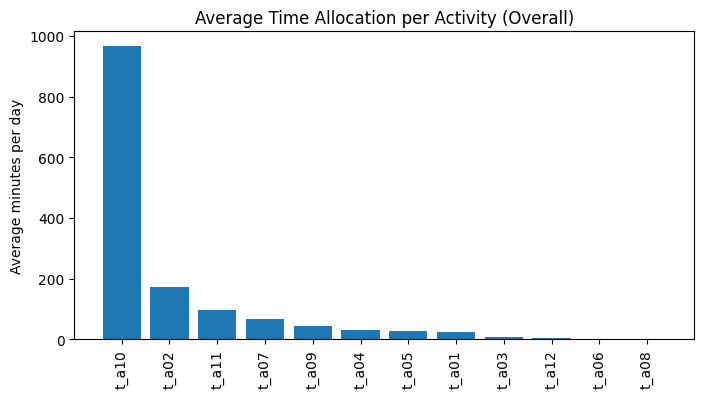

In [9]:
plt.figure(figsize=(8,4))
plt.bar(mean_times.index, mean_times.values)
plt.xticks(rotation=90)
plt.ylabel("Average minutes per day")
plt.title("Average Time Allocation per Activity (Overall)")
plt.show()


This bar chart shows which activities dominate a typical day. "Home" (including sleep), t\_a10 is the largest, followed by work t\_a02 (if including both workers and non-workers averaged, maybe a bit lower due to some zero for non-workers), then travelling, etc.

(c) Compare weekdays vs weekends:

We can leverage the `weekend` column (1 for weekend days, 0 for weekdays). Let's calculate average time by activity for weekdays and weekends separately.

In [10]:
mean_times_weekday = df_time[df_time["weekend"]==0][activities].mean()
mean_times_weekend = df_time[df_time["weekend"]==1][activities].mean()
diff = (mean_times_weekend - mean_times_weekday).sort_values()
print("Weekend minus Weekday (minutes):\n", diff.round(1))


Weekend minus Weekday (minutes):
 t_a02   -214.4
t_a11    -35.3
t_a03     -7.6
t_a12     -4.1
t_a05     -1.7
t_a08      0.3
t_a06      0.3
t_a01      2.7
t_a04     11.6
t_a09     22.0
t_a07     44.9
t_a10    181.4
dtype: float64


This shows which activities get more time on weekends vs weekdays. We see:

- Work time (t_a02) much lower on weekends.

- Social/Leisure (t_a07) higher on weekends.

- Home time possibly (t_a10) higher on weekends (sleep in or relax more).

- Travel (everyday travel t_a11) might be less on weekend (no commute) but more long travel (vacation t_a08) on weekends.

- Exercise (t_a09) could be higher on weekends if people do sports then.

Let's illustrate by plotting a few notable differences:

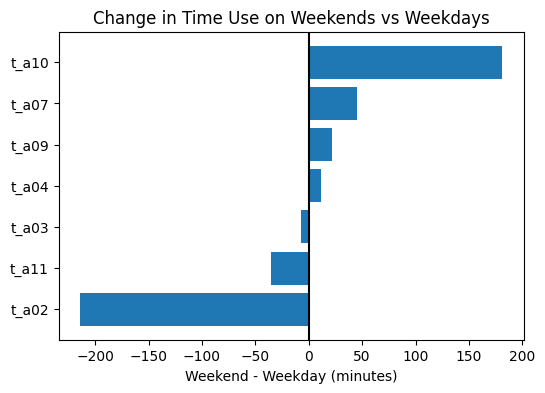

In [11]:
diff_sorted = diff[abs(diff) > 5]  # only show differences >5 mins for clarity
plt.figure(figsize=(6,4))
plt.barh(diff_sorted.index, diff_sorted.values)
plt.xlabel("Weekend - Weekday (minutes)")
plt.title("Change in Time Use on Weekends vs Weekdays")
plt.axvline(0, color='black')
plt.show()


This horizontal bar chart highlights, for example, "t_a02 (work): -X minutes" (big negative, meaning much less work on weekends), "t_a07 (leisure): +Y minutes" (more leisure on weekends), etc.

We should label categories more readably in any output or explanation (e.g., t_a02 = work, t_a07 = leisure, etc.). But since in code output, we see t_a numbers, let's map a few:

According to data dictionary:

- t_a02: working,

- t_a07: social/leisure,

- t_a10: at home,

- t_a11: everyday traveling,

- t_a08: vacation/long travel,

- t_a09: exercise.

### Modeling/Simulation Task: Time Reallocation Scenario

### Task 2: Simulation – If work hours are reduced, how might people reallocate that time?

**Scenario:** Suppose a policy introduced a 4-day work week (or simply, each weekday people work 1 hour less on average). We want to simulate how that freed hour (60 minutes) might be redistributed among other activities on weekdays.

One simple approach: Look at how people who work less currently allocate time differently than those who work full-time. The dataset has `occ_full_time` (1 if person works full time, 0 otherwise). We can compare the time allocation of full-timers vs others to guess where work time goes.

Let's do that:

In [12]:
full_timers = df_time[df_time["occ_full_time"] == 1][activities].mean()
part_others = df_time[df_time["occ_full_time"] == 0][activities].mean()
diff_workstatus = (part_others - full_timers).sort_values()
print("Non-full-time minus Full-time (avg minutes):\n", diff_workstatus.round(1))


Non-full-time minus Full-time (avg minutes):
 t_a02   -136.0
t_a11    -23.6
t_a06     -1.9
t_a01     -1.3
t_a08     -0.6
t_a04     -0.3
t_a12      0.2
t_a09      1.0
t_a07      6.9
t_a05      8.4
t_a03     14.4
t_a10    132.9
dtype: float64


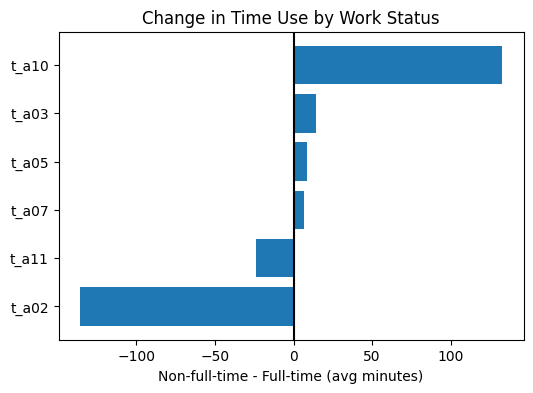

In [17]:

diff_sorted = diff_workstatus[abs(diff_workstatus) > 5]  
plt.figure(figsize=(6,4))
plt.barh(diff_sorted.index, diff_sorted.values)
plt.xlabel("Non-full-time - Full-time (avg minutes)")
plt.title("Change in Time Use by Work Status")
plt.axvline(0, color='black')
plt.show()



This shows how non-full-time people (who presumably work less) spend their time compared to full-timers.

- They spend fewer minutes in work.

- They spend more time at home.

- ...

# 05.2 Drug Choice Data Project